In [239]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [240]:
from scipy.signal import savgol_filter
from scipy.signal import find_peaks


In [241]:
%matplotlib inline

In [242]:
sns.set_theme(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.45, "grid.alpha":0.5}) 

In [243]:
region = 2

In [244]:
df_one = pd.read_csv(rf"E:\Projects\Vibration Sensing Touch Panel\data\region{region}_extended\SENSOR1_data.csv")
df_origin = pd.read_csv(rf"E:\Projects\Vibration Sensing Touch Panel\data\region{region}_extended\SENSOR1_data.csv")
df_two = pd.read_csv(rf"E:\Projects\Vibration Sensing Touch Panel\data\region{region}_extended\SENSOR2_data.csv")

In [245]:
def set_df(df,normalize=True):
    df.index = pd.to_datetime(df.timestamp)
    df.drop(labels='timestamp',axis=1,inplace=True)

    if normalize == True:
        for col in df:
            std = np.std(df[col])
            df[col] = df[col]-np.mean(df[col])
            df[col] = df[col]/std
            
    return df

In [246]:
df_origin = set_df(df_origin,normalize=False)
df_one = set_df(df_one,normalize=True)
df_two = set_df(df_two)

In [247]:
recording_start = max(df_one.index[0],df_two.index[0])
recording_end = min(df_one.index[-1],df_two.index[-1])

df_one = df_one.loc[recording_start:recording_end]
df_origin = df_origin.loc[recording_start:recording_end]
df_two = df_two.loc[recording_start:recording_end]

In [248]:
def plot_by_minute(ax,axis,channel,df):

    colors = ['red','blue']

    interval_start = df.index[0]
    interval_end = df.index[0]+pd.Timedelta(seconds=60)
    index = 0

    while interval_start < df.index[-1]:

        df_minute = df.loc[interval_start:interval_end]
        df_minute.index -= interval_start

        sns.lineplot(x=df_minute.index,y=df_minute[axis],ax=ax[index][channel],errorbar=None,color=colors[channel])

        interval_start += pd.Timedelta(seconds=60)
        interval_end += pd.Timedelta(seconds=60)
        index += 1

In [249]:
def plot_minute(ax,axis,channel,df,minute):
    
    colors = ['red','blue']

    interval_start = df.index[0]+pd.Timedelta(seconds=60*(minute-1))
    interval_end = df.index[0]+pd.Timedelta(seconds=60*(minute))

    df_minute = df.loc[interval_start:interval_end]

    sns.lineplot(x=df_minute.index,y=df_minute[axis],ax=ax[channel],errorbar=None,color=colors[channel%2])


In [250]:
duration = df_one.index[-1]-df_one.index[0]
duration = duration.components[2] #index 2 in duration returns number of minutes in timedelta object

In [251]:
"""
fig,ax = plt.subplots(nrows=duration+1,ncols=2,figsize=(20,10),sharex='all',sharey='all')

plot_by_minute(ax=ax,axis='z',channel=0,df=df_one)
plot_by_minute(ax=ax,axis='z',channel=1,df=df_two)
"""

"\nfig,ax = plt.subplots(nrows=duration+1,ncols=2,figsize=(20,10),sharex='all',sharey='all')\n\nplot_by_minute(ax=ax,axis='z',channel=0,df=df_one)\nplot_by_minute(ax=ax,axis='z',channel=1,df=df_two)\n"

<Axes: xlabel='timestamp', ylabel='z_filtered'>

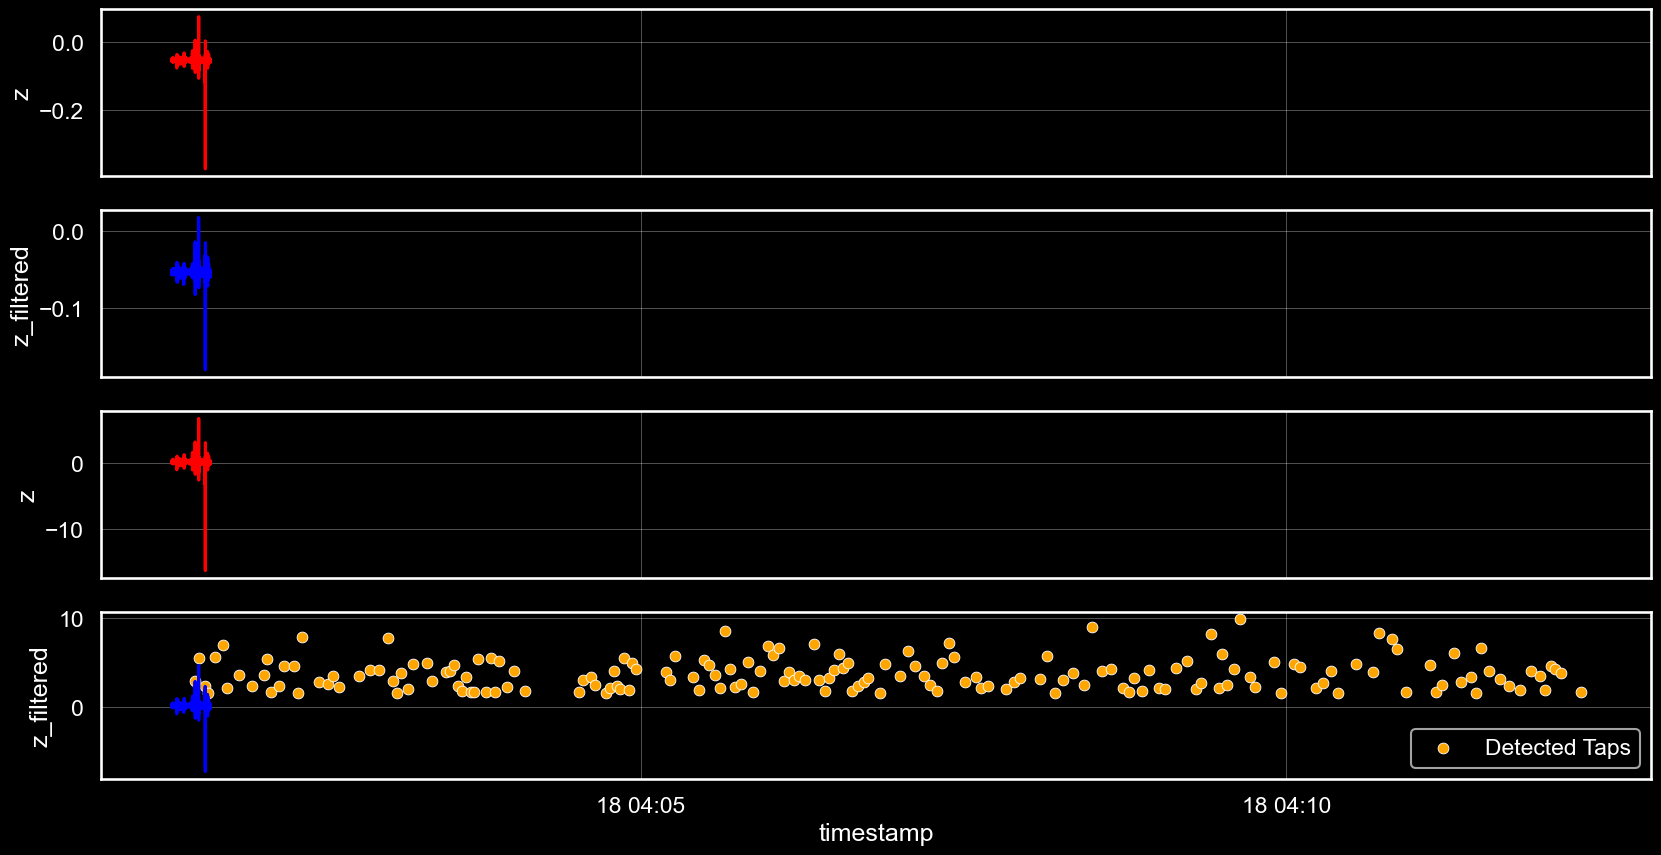

In [257]:
dur = 0.3

df_origin['z_filtered'] = savgol_filter(x=df_origin['z'],polyorder=12,window_length=24)
df_one['z_filtered'] = savgol_filter(x=df_one['z'],polyorder=5,window_length=8)

peaks, properties = find_peaks(df_one['z_filtered'], height=1.5, distance=40)




fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(20,10),sharex='all')

plot_minute(ax=ax,axis='z',channel=0,df=df_origin,minute=dur)
plot_minute(ax=ax,axis='z_filtered',channel=1,df=df_origin,minute=dur)

plot_minute(ax=ax,axis='z',channel=2,df=df_one,minute=dur)
plot_minute(ax=ax,axis='z_filtered',channel=3,df=df_one,minute=dur)

sns.scatterplot(x=df_one.index[peaks], y=df_one['z_filtered'].iloc[peaks],
                color='orange', label='Detected Taps', s=60)






In [253]:
savgol_filter(x:)

SyntaxError: invalid syntax (3413847182.py, line 1)